EoMT
=====


**Your ViT is Secretly an Image Segmentation Model**
 * Paper: https://arxiv.org/abs/2503.19108

![EOMT Comparison](../assets/eomt_comparison.png)

![EOMT Architecture](../assets/eomt_arch.png)

* Installation

```bash
pip install torch torchvision

# need transformers version >= 4.54.0 
pip install git+https://github.com/huggingface/transformers
```

In [1]:
import transformers
transformers.__version__

/home/pyml/anaconda3/envs/eomt/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'4.54.0.dev0'

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

import torch
from transformers import EomtForUniversalSegmentation, AutoImageProcessor


/home/pyml/anaconda3/envs/eomt/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_id = "tue-mps/coco_panoptic_eomt_large_640"
processor = AutoImageProcessor.from_pretrained(model_id)
model = EomtForUniversalSegmentation.from_pretrained(model_id)

model.eval().to(device);

In [6]:
image_path = "../samples/plants.jpg"
image = Image.open(image_path).convert("RGB")

inputs = processor(images=image, return_tensors="pt")
inputs = inputs.to(device)
with torch.inference_mode():
    outputs = model(**inputs)

original_image_sizes = [(image.height, image.width)]
preds = processor.post_process_panoptic_segmentation(outputs, original_image_sizes)

preds[0].keys()

dict_keys(['segmentation', 'segments_info'])

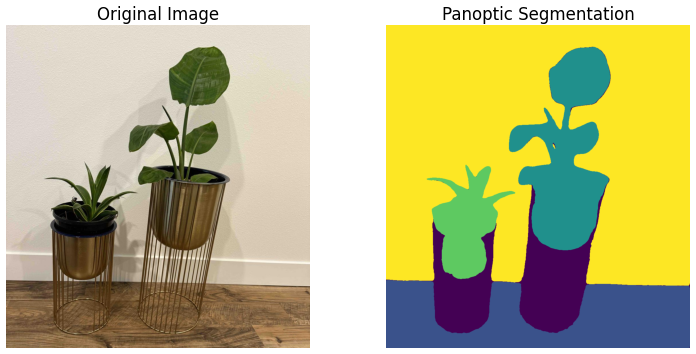

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), dpi=60)

axes[0].imshow(image)
axes[0].set_title("Original Image", fontsize=20)
axes[0].axis("off")
axes[1].imshow(preds[0]["segmentation"].cpu().numpy())
axes[1].set_title("Panoptic Segmentation", fontsize=20)
axes[1].axis("off")
plt.show()